In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [6]:
# Data Collection and Pre Processing
# 1 Load Data from csv file to a pandas datafram
df= pd.read_csv('Spam email detection.csv')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

In [8]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Renaming Column name with appropriate column name

In [11]:
# Renameing columns v1 and v2
df.rename(columns={'v1':'Target', 'v2':'SMS'}, inplace = True)

# Checking Null Values

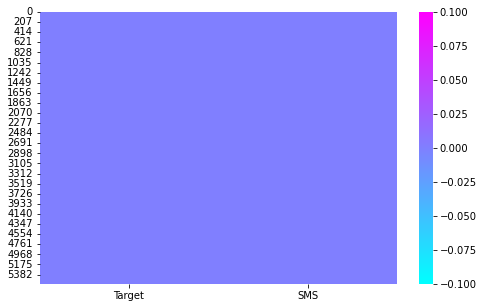

In [12]:
import seaborn as sns
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cmap = 'cool')
plt.show()

In [13]:
df.isnull().sum()

Target    0
SMS       0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df.drop_duplicates(keep = 'first', inplace =True)

# Feature Extraction

In this section we will create three features :

Number of character in each SMS

Number of Word in each SMS

Number of sentence in each SMS

In [17]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud

In [18]:
df['No_of_characters'] = df['SMS'].apply(len)

In [19]:
df['No_of_word'] = df['SMS'].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
df['No_of_sentences'] = df['SMS'].apply(lambda x:len(nltk.sent_tokenize(x)))

# EDA

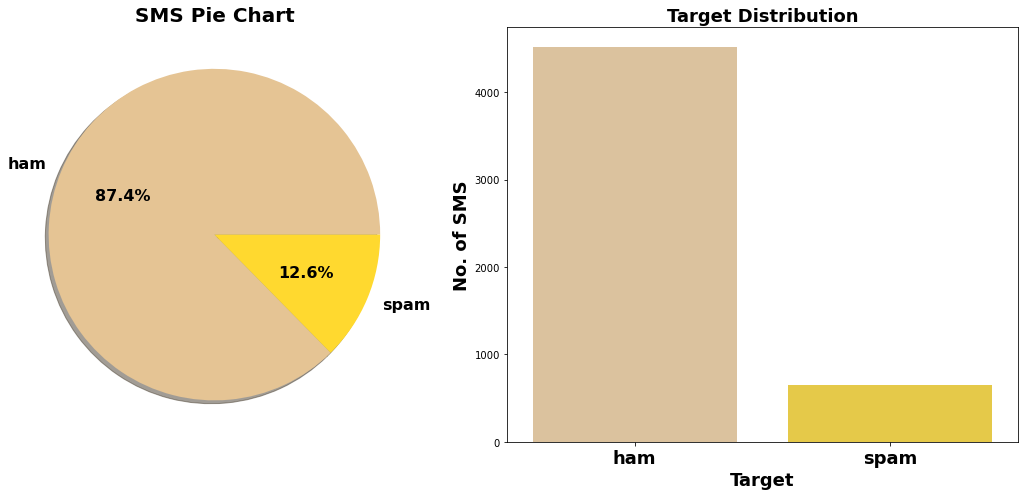

Value Counts of Target:


ham     4516
spam     653
Name: Target, dtype: int64

In [21]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Target'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('SMS Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Target',data=df,ax=ax[1])
ax[1].set_title('Target Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Target",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of SMS",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Target:')
df['Target'].value_counts()

Around 87.4% SMS are HAM while 12.6% SMS are SPAM in nature.

In [22]:
df.head()

,Target,SMS,No_of_characters,No_of_word,No_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[df['Target'] == 'ham'][["No_of_characters",'No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


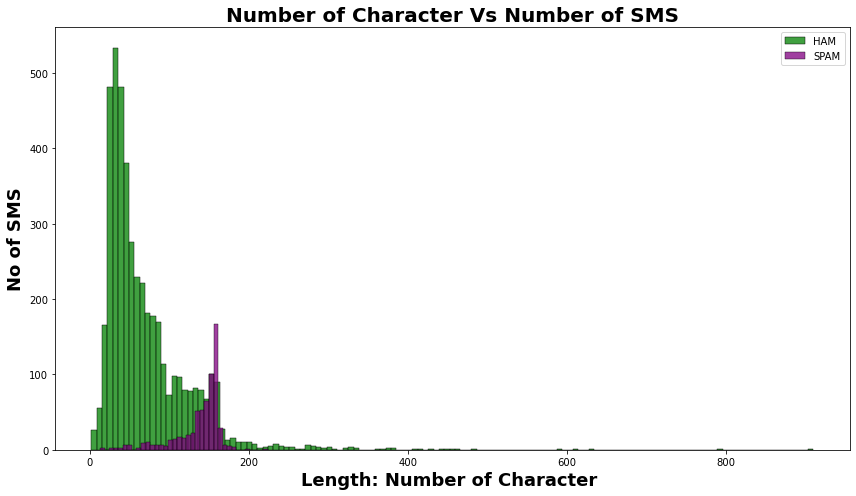

In [24]:
plt.figure(figsize=(12, 7))
g = sns.histplot(df["No_of_characters"][(df["Target"] == 'ham')], color="Green")
g = sns.histplot(df["No_of_characters"][(df["Target"] == 'spam')], ax =g, color="Purple")
g.set_xlabel("Length: Number of Character ", fontsize=18, fontweight = 'bold')
g.set_ylabel("No of SMS", fontsize=18, fontweight = 'bold')
plt.title('Number of Character Vs Number of SMS', fontsize=20, fontweight = 'bold')
g = g.legend(['HAM', 'SPAM'])
plt.show()

# Comment :
Number of character in Spam sms is comparetively much high than Non-Spam (ham) sms.
On average each ham sms contain 71 character, 17 words and 2 sentences.

In [25]:
df[df['Target'] == 'spam'][["No_of_characters",'No_of_word','No_of_sentences']].describe()

,No_of_characters,No_of_word,No_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


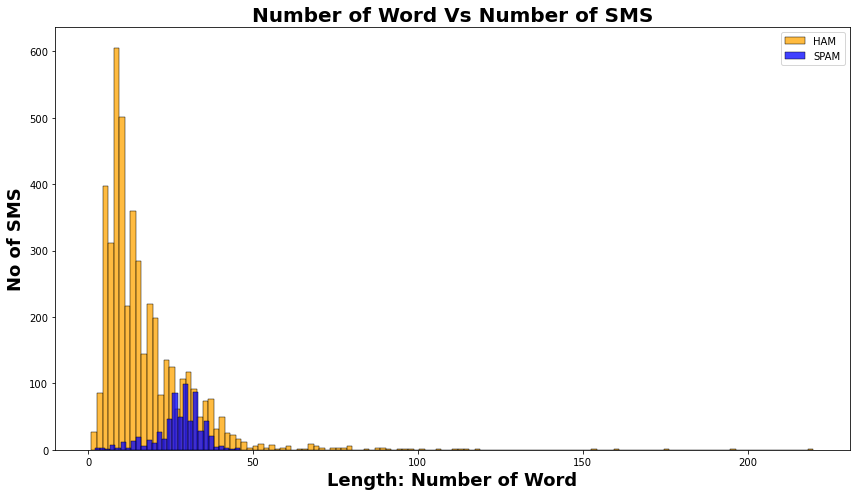

In [26]:
plt.figure(figsize=(12, 7))
g = sns.histplot(df["No_of_word"][(df["Target"] == 'ham')], color="orange")
g = sns.histplot(df["No_of_word"][(df["Target"] == 'spam')], ax =g, color="blue")
g.set_xlabel("Length: Number of Word", fontsize=18, fontweight = 'bold')
g.set_ylabel("No of SMS", fontsize=18, fontweight = 'bold')
plt.title('Number of Word Vs Number of SMS', fontsize=20, fontweight = 'bold')
g = g.legend(['HAM', 'SPAM'])
plt.show()

# Comment :
Number of Word in Spam sms is comparetively much high than Non-Spam (ham) sms.
On average each spam sms contain 138 character, 27 words and 3 sentences.

# Label Encoding of Target Variables

In [27]:
from sklearn.preprocessing import LabelEncoder
lb_encoder = LabelEncoder()

In [28]:
df['Target'] = lb_encoder.fit_transform(df['Target'])

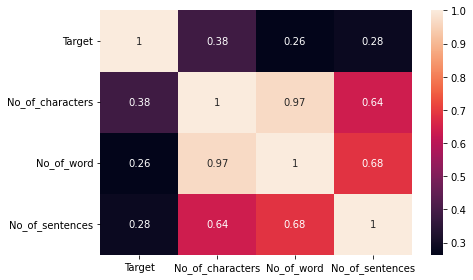

In [29]:
plt.figure(figsize=(7, 4))
sns.heatmap(df.corr(),annot=True)
plt.show()

# Text Mining

In [30]:
from nltk.corpus import stopwords

In [31]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [32]:
#Calling the class
clean_text(df, 'SMS')
df['SMS'].tail(3)

5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: SMS, dtype: object

# Word Cloud
Word Cloud is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency.
The more commonly the term appears within the text being analysed, the larger the word appears in the image generated.
The enlarged texts are the most number of words used there and small texts are the less number of words used.

# Word Cloud for HAM SMS

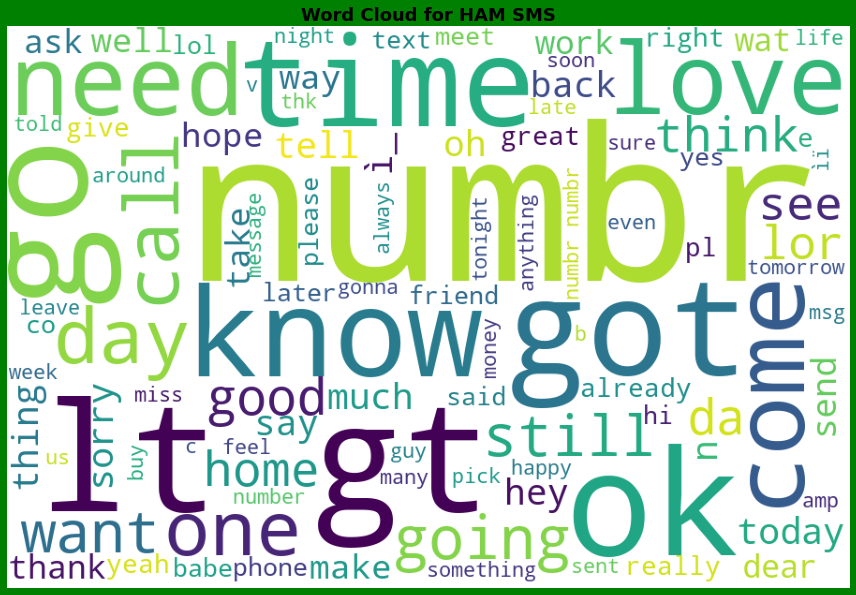

In [33]:
# Word cloud of ham SMS
zero = df['SMS'][df['Target'] == 0]
zero_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 100).generate(' '.join(zero))
plt.figure(figsize = (12,9), facecolor = 'g')
plt.imshow(zero_cloud)
plt.axis('off')
plt.title('Word Cloud for HAM SMS', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

# 2. Word Cloud for SPAM SMS

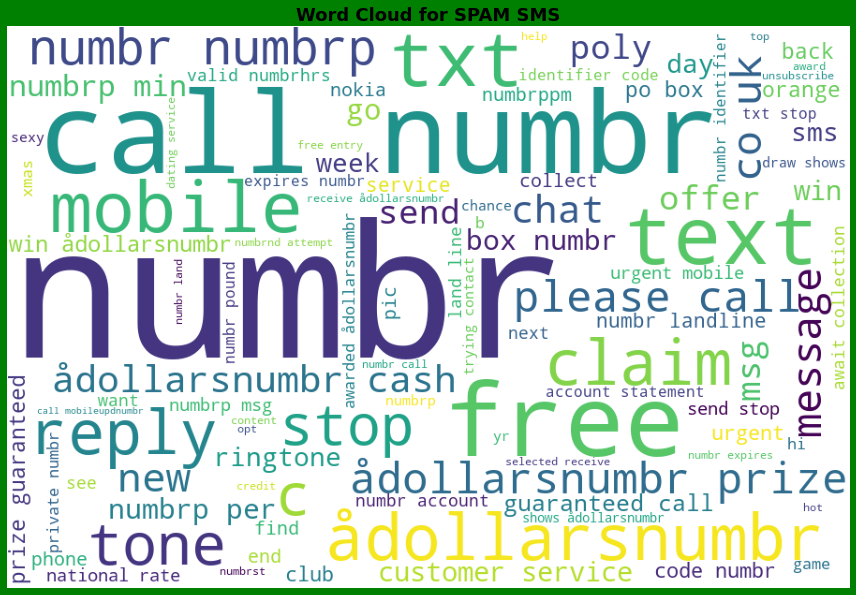

In [34]:
# Word cloud of Spam SMS
one = df['SMS'][df['Target'] == 1]
one_cloud = wordcloud.WordCloud(width = 900, height = 600, background_color = 'white', max_words = 100).generate(' '.join(one))
plt.figure(figsize = (12,9), facecolor = 'g')
plt.imshow(one_cloud)
plt.axis('off')
plt.title('Word Cloud for SPAM SMS', fontsize= 18, fontweight = 'bold')
plt.tight_layout(pad = 0)
plt.show()

# Top 20 Ham Word in SMS Corpus

In [35]:
ham_corpus = []
for i in df[df['Target'] == 0]['SMS'].tolist():
    for word in i.split():
        ham_corpus.append(word)

In [36]:
len(ham_corpus)

35163

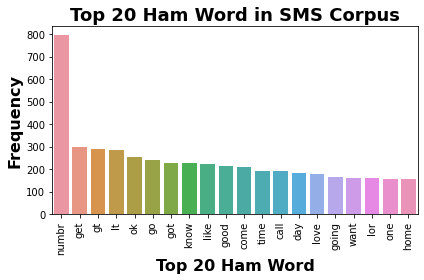

In [37]:
from collections import Counter
c= sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
c.set_xlabel("Top 20 Ham Word", fontsize=16, fontweight = 'bold')
c.set_ylabel("Frequency", fontsize=16, fontweight = 'bold')
plt.title('Top 20 Ham Word in SMS Corpus', fontsize=18, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

# Top 20 Spam Word in SMS Corpus

In [38]:
spam_corpus = []
for i in df[df['Target'] == 1]['SMS'].tolist():
    for word in i.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

11345

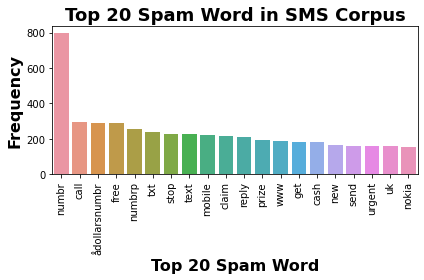

In [40]:
from collections import Counter
c= sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
c.set_xlabel("Top 20 Spam Word", fontsize=16, fontweight = 'bold')
c.set_ylabel("Frequency", fontsize=16, fontweight = 'bold')
plt.title('Top 20 Spam Word in SMS Corpus', fontsize=18, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.tight_layout()
plt.show()

Text Vectorization to convert text into numeric

In [41]:
# Converting text into numeric using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)
features = tf.fit_transform(df['SMS'])
X=features
Y=df[['Target']]

In [42]:
X.shape

(5169, 3000)

In [43]:
Y.shape

(5169, 1)

# Machine Learning Model Building

In [45]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,precision_score,classification_report,accuracy_score

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (3618, 3000)
Training target vector size: (3618, 1)
Test feature matrix size: (1551, 3000)
Test target vector size: (1551, 1)


# Logistics Regression

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Logistics Regression :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9645390070921985


Precision Score of Logistics Regression : 0.9863945578231292


Confusion matrix of Logistics Regression : 
 [[1351    2]
 [  53  145]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1353
           1       0.99      0.73      0.84       198

    accuracy                           0.96      1551
   macro avg       0.97      0.87      0.91      1551
weighted avg       0.97      0.96      0.96      1551



In [48]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

Precision CVScore : [0.95652174 0.99       0.98058252 0.95918367 0.95412844]
Mean CV Precision Score : 0.968083275447728
Std deviation : 0.014451183313399599


# Random Forest Classifier

In [49]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Random Forest Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9819471308833011


Precision Score of Random Forest Classifier : 0.9829545454545454


Confusion matrix of Random Forest Classifier : 
 [[1350    3]
 [  25  173]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       0.98      0.87      0.93       198

    accuracy                           0.98      1551
   macro avg       0.98      0.94      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [50]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(rfc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Precision Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.99145299 1.         0.98198198 0.99090909 1.        ]
Mean CV Precision Score : 0.992868812868813
Std deviation : 0.0067242219921621925


# MultinomialNB Classifier

In [51]:
mnb = MultinomialNB()
mnb.fit(X_train,Y_train)
y_pred=mnb.predict(X_test)
print('\033[1m'+'MultinomialNB Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of MultinomialNB Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of MultinomialNB Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of MultinomialNB Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of MultinomialNB Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

MultinomialNB Classifier


Accuracy Score of MultinomialNB Classifier : 0.9813023855577047


Precision Score of MultinomialNB Classifier : 1.0


Confusion matrix of MultinomialNB Classifier : 
 [[1353    0]
 [  29  169]]


classification Report of MultinomialNB Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       1.00      0.85      0.92       198

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551



In [52]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(mnb, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', mnb, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score MultinomialNB() :

Precision CVScore : [0.99152542 1.         1.         1.         0.97345133]
Mean Precision CV Score : 0.9929953502324883
Std deviation : 0.010308490347136877


# BernoulliNB Classifier

In [53]:
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
y_pred=bnb.predict(X_test)
print('\033[1m'+'BernoulliNB Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of BernoulliNB Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of BernoulliNB Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of BernoulliNB Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of BernoulliNB Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

BernoulliNB Classifier


Accuracy Score of BernoulliNB Classifier : 0.9877498388136686


Precision Score of BernoulliNB Classifier : 0.9890710382513661


Confusion matrix of BernoulliNB Classifier : 
 [[1351    2]
 [  17  181]]


classification Report of BernoulliNB Classifier 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1353
           1       0.99      0.91      0.95       198

    accuracy                           0.99      1551
   macro avg       0.99      0.96      0.97      1551
weighted avg       0.99      0.99      0.99      1551



In [54]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(bnb, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', bnb, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score BernoulliNB() :

Precision CVScore : [0.99186992 0.98373984 0.97478992 0.99145299 1.        ]
Mean Precision CV Score : 0.9883705327033878
Std deviation : 0.00851901700736384


# Extra Trees Classifier

In [56]:
etc = ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'Extra Trees Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Extra Trees Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Extra Trees Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Extra Trees Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Extra Trees Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

Extra Trees Classifier


Accuracy Score of Extra Trees Classifier : 0.9858156028368794


Precision Score of Extra Trees Classifier : 0.9943820224719101


Confusion matrix of Extra Trees Classifier : 
 [[1352    1]
 [  21  177]]


classification Report of Extra Trees Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1353
           1       0.99      0.89      0.94       198

    accuracy                           0.99      1551
   macro avg       0.99      0.95      0.97      1551
weighted avg       0.99      0.99      0.99      1551



In [57]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(etc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score', etc, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score ExtraTreesClassifier() :

Precision CVScore : [0.98347107 0.99159664 0.99099099 0.98245614 0.98230088]
Mean Precision CV Score : 0.9861631458666495
Std deviation : 0.004212769411132316


# AdaBoost Classifier

In [58]:
adbc=AdaBoostClassifier()
adbc.fit(X_train,Y_train)
y_pred=adbc.predict(X_test)
print('\033[1m'+'AdaBoost Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of AdaBoost Classifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Precision Score of Extra Trees Classifier :'+'\033[0m', precision_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of AdaBoost Classifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of AdaBoost Classifier'+'\033[0m \n',classification_report(Y_test, y_pred))

AdaBoost Classifier Evaluation


Accuracy Score of AdaBoost Classifier : 0.973565441650548


Precision Score of Extra Trees Classifier : 0.9153439153439153


Confusion matrix of AdaBoost Classifier : 
 [[1337   16]
 [  25  173]]


classification Report of AdaBoost Classifier 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1353
           1       0.92      0.87      0.89       198

    accuracy                           0.97      1551
   macro avg       0.95      0.93      0.94      1551
weighted avg       0.97      0.97      0.97      1551



In [59]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(adbc, X, Y, cv =5, scoring='precision')
print('\033[1m'+'Cross Validation Score',adbc, ':'+'\033[0m\n')
print("Precision CVScore :" ,CVscore)
print("Mean Precision CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score AdaBoostClassifier() :

Precision CVScore : [0.9296875  0.94308943 0.90909091 0.90983607 0.95689655]
Mean Precision CV Score : 0.9297200914566253
Std deviation : 0.018645310092689566


In [60]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))